In [ ]:
import numpy as np
import scipy as sp

# Set the random seed for reproducibility
np.random.seed(0)

# set scale and location matrix and number of samples
location = np.array([0, 0])
scale_matrix = np.array([[1, 0], [0, 1]])
num_samples = 10000

# draw samples (note that a multivariate cauchy is just a multivariate t with degree of freedom 1)
cauchy_variable = sp.stats.multivariate_t(loc = location, shape = scale_matrix, df = 1)
samples = cauchy_variable.rvs(num_samples)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the generator network
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim)
        )

    def forward(self, z):
        return self.model(z)

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Hyperparameters
latent_dim = 128
output_dim = 2  # Output dimension of the Cauchy distribution (2D)
num_epochs = 500
batch_size = 100
learning_rate = 0.0002

# Initialize the networks and optimizers
generator = Generator(latent_dim, output_dim)
discriminator = Discriminator(output_dim)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate)


# Training loop
for epoch in range(num_epochs):
    for i in range(0, len(samples), batch_size):
        real_samples = torch.tensor(samples[i:i+batch_size], dtype=torch.float32)

        # Train discriminator
        optimizer_D.zero_grad()
        real_labels = torch.ones(real_samples.size(0), 1)
        real_output = discriminator(real_samples)
        d_loss_real = criterion(real_output, real_labels)

        z = torch.randn(batch_size, latent_dim)
        fake_samples = generator(z)
        fake_labels = torch.zeros(batch_size, 1)
        fake_output = discriminator(fake_samples)
        d_loss_fake = criterion(fake_output, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()


        # Train generator
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim)
        fake_samples = generator(z)
        output = discriminator(fake_samples)
        g_loss = criterion(output, real_labels)
        g_loss.backward()
        optimizer_G.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")




Epoch [10/500], D Loss: 0.7766, G Loss: 1.2168
Epoch [20/500], D Loss: 1.7111, G Loss: 1.1941
Epoch [30/500], D Loss: 1.4848, G Loss: 1.4205
Epoch [40/500], D Loss: 0.9847, G Loss: 1.1999
Epoch [50/500], D Loss: 1.2533, G Loss: 0.8559
Epoch [60/500], D Loss: 1.2899, G Loss: 0.7645
Epoch [70/500], D Loss: 1.3135, G Loss: 0.7553
Epoch [80/500], D Loss: 1.3276, G Loss: 0.7620
Epoch [90/500], D Loss: 1.3545, G Loss: 0.8211
Epoch [100/500], D Loss: 1.3579, G Loss: 0.7476
Epoch [110/500], D Loss: 1.3589, G Loss: 0.7582
Epoch [120/500], D Loss: 1.3725, G Loss: 0.7321
Epoch [130/500], D Loss: 1.3950, G Loss: 0.7162
Epoch [140/500], D Loss: 1.3639, G Loss: 0.7269
Epoch [150/500], D Loss: 1.3728, G Loss: 0.7207
Epoch [160/500], D Loss: 1.3578, G Loss: 0.7086
Epoch [170/500], D Loss: 1.3747, G Loss: 0.7164
Epoch [180/500], D Loss: 1.3596, G Loss: 0.7367
Epoch [190/500], D Loss: 1.3662, G Loss: 0.7305
Epoch [200/500], D Loss: 1.3612, G Loss: 0.7175
Epoch [210/500], D Loss: 1.3767, G Loss: 0.7376
E

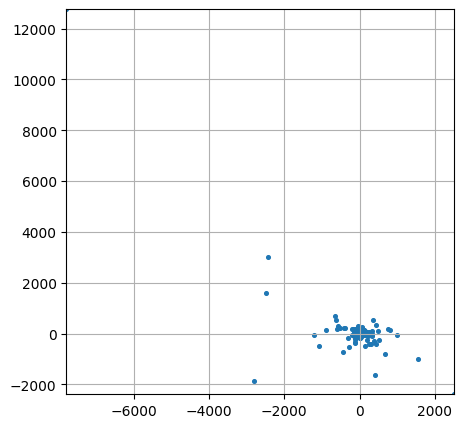

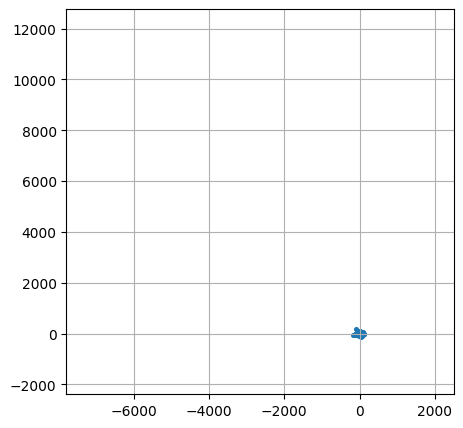

In [ ]:
np.random.seed(0)
# Generate GAN samples
num_gan_samples = 10000
z = torch.randn(num_gan_samples, latent_dim)
gan_samples = generator(z).detach().numpy()

# Calculate limits for consistent axes
min_x = min(np.min(samples[:, 0]), np.min(gan_samples[:, 0]))
max_x = max(np.max(samples[:, 0]), np.max(gan_samples[:, 0]))
min_y = min(np.min(samples[:, 1]), np.min(gan_samples[:, 1]))
max_y = max(np.max(samples[:, 1]), np.max(gan_samples[:, 1]))


# Create the scatter plots with consistent axes
plt.figure(figsize=(5, 5))
plt.scatter(samples[:, 0], samples[:, 1], s=7)
plt.grid(True)
plt.xlim(min_x, max_x)  # Set x-axis limits
plt.ylim(min_y, max_y)  # Set y-axis limits
plt.savefig('original_samples_wider.png')

plt.figure(figsize=(5, 5))
plt.scatter(gan_samples[:, 0], gan_samples[:, 1], s=7)
plt.grid(True)
plt.xlim(min_x, max_x)  # Set x-axis limits
plt.ylim(min_y, max_y)  # Set y-axis limits
plt.savefig('gan_samples_wider.png')

plt.show()
